<a href="https://colab.research.google.com/github/Tensor-Reloaded/PMP-2024/blob/main/Lab03/exemplu_pgmpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un anumit produs se poate afla la vanzare (20%) cu reducere sau cu pret intreg. Cumparatorul poate avea nevoie urgenta (5%) de produsul respectiv sau nu. Cumparatorul ia decizia sa cumpere produsul dupa urmatoarele reguli:
1. produsul este la reducere si are nevoie urgent de el -> cumperi 100%
2. produsul este la reducere dar nu are nevoie urgent de el -> cumperi 50%
3. fara reducere si are nevoie urgent -> cumperi 80%
4. fara reducere si nu are nevoie urgent -> cumperi 20%

Afisati probabilitatea ca cumparatorul sa fi avut nevoie urgenta de produs daca stim ca acesta a cumparat produsul.

**Raspuns teoretic:**

$$
P(U=1|C=1)=\frac{P(C=1|U=1)P(U=1)}{P(C=1|U=1)P(U=1)+P(C=1|U=0)P(U=0)}.
$$
Avem:
\begin{align*}
P(C=1|U=1)  & =P(C=1|U=1,R=1)P(R=1)+P(C=1|U=1,R=0)P(R=0)\\
& =1\cdot0.2+0.8\cdot0.8=0.84;\\
P(C=1|U=0)  & =P(C=1|U=0,R=1)P(R=1)+P(C=1|U=0,R=0)P(R=0)\\
& =0.5\cdot0.2+0.2\cdot0.8=0.26.
\end{align*}
Deci
$$
P(U=1|C=1)=\frac{0.84\cdot0.05}{0.84\cdot0.05+0.26\cdot0.95}=0.14533.
$$

Install Graphviz: https://graphviz.org/download/

(For ARM Macs: https://github.com/pygraphviz/pygraphviz/issues/398)

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference.ExactInference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = DiscreteBayesianNetwork([('R', 'C'), ('U', 'C')])

# Defining individual CPDs.
cpd_r = TabularCPD(variable='R', variable_card=2, values=[[0.8], [0.2]]) # R=0 full price, R=1 discount
cpd_u = TabularCPD(variable='U', variable_card=2, values=[[0.95], [0.05]]) # U=0 no urgent need, U=1 urgent need

# The CPD for C is defined using the conditional probabilities based on U and R
cpd_c = TabularCPD(variable='C', variable_card=2,
                   values=[[0.8, 0.5, 0.2, 0.0],
                           [0.2, 0.5, 0.8, 1.0]],
                  evidence=['U', 'R'],
                  evidence_card=[2, 2])

# Associating the CPDs with the network
model.add_cpds(cpd_r, cpd_u, cpd_c)

In [12]:
# Verifying the model
assert model.check_model()

+------+----------+
| U    |   phi(U) |
+======+==========+
| U(0) |   0.8547 |
+------+----------+
| U(1) |   0.1453 |
+------+----------+


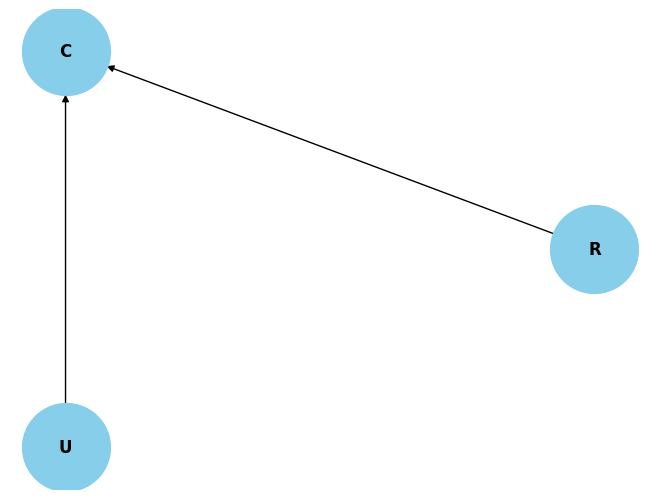

In [13]:
# Performing exact inference using Variable Elimination
infer = VariableElimination(model)
result = infer.query(variables=['U'], evidence={'C': 1})
print(result)

pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()
